   # FOOTBALL PLAYERS RATINGS

                                                                                                       BY:- Kumar Abhinandan 

In [1]:
#Importing important libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df_train=pd.read_csv(r"C:\Users\abhin\OneDrive\Desktop\EDA\Football_dataset\train.csv")
df_test=pd.read_csv(r"C:\Users\abhin\OneDrive\Desktop\EDA\Football_dataset\test.csv")

In [3]:
#checking shape of dataset
print(df_train.shape)
print(df_test.shape)

(20453, 800)
(8774, 799)


In [4]:
#view all column and top 5 rows of dataframe
pd.set_option('display.max_columns',None)
df_train.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_othe

In [5]:
# Saving rating_num and row_id for later use before droping it.
target = df_train['rating_num']
ids=df_train['row_id']

In [6]:
#Dropping row id and target columns from both train and test dataframe
df_train.drop(['row_id','rating_num'],axis=1,inplace=True)
df_test.drop(['row_id'],axis=1,inplace=True)

In [7]:
#concating both dataframe
df = pd.concat([df_train,df_test],axis=0).reset_index(drop=True)
df.head()

,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_other_raw_var_144,play

# Data Cleaning

In [8]:
# making a copy of data
data1 = df.copy()

In [9]:
# getting all numeric columns
data1.select_dtypes(np.number) 

scout_id  competitionId  player_position_1  player_position_2  \
0            13            8.0                7.0                7.0   
1            16            8.0                3.0                9.0   
2             4            5.0               11.0               11.0   
3            13            4.0               17.0               17.0   
4            11            5.0               10.0               10.0   
...         ...            ...                ...                ...   
29222        15            7.0               11.0               11.0   
29223         2            4.0               16.0               16.0   
29224         2            4.0                1.0                1.0   
29225        11           10.0                1.0                1.0   
29226         3            4.0                3.0                3.0   

       player_height  player_weight  player_general_var_0  \
0           0.317073           0.48                   0.0   
1           0.463415           0.42                   0.0   
2           0.682927           0.44                   0.0   
3           0.682927           0.58                   0.0   
4           0.731707           0.70                   0.0   
...              ...            ...                   ...   
29222       0.463415           0.60                   0.0   
29223       0.341463           0.40                   0.2   
29224       0.439024           0.36                   0.0   
29225       0.463415           0.54                   0.0   
29226       0.560976           0.48                   0.0   

       player_general_var_1  player_general_var_2  player_general_var_3  \
0                         0               0.00000                   0.0   
1                         0               0.00000                   0.0   
2                         0               0.00000                   0.0   
3                         0               0.00000                   0.0   
4                         0               0.00000                   0.0   
...                     ...                   ...                   ...   
29222                     0               0.00000                   0.0   
29223                     0               0.00000                   0.0   
29224                     0               0.00000                   0.0   
29225                     0               0.00000                   0.0   
29226                     0               0.77451                   0.0   

       player_general_var_4  player_general_var_5  \
0                  0.114754                  0.00   
1                  0.081967                  0.00   
2                  0.065574                  0.25   
3                  0.000000                  0.00   
4                  0.262295                  0.25   
...                     ...                   ...   
29222              0.065574                  0.00   
29223              0.049180                  0.00   
29224              0.040984                  0.00   
29225              0.016393                  0.00   
29226              0.032787                  0.00   

       player_positional_raw_var_0  player_positional_raw_var_1  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
29222                          0.0                          0.0   
29223                          0.0                          0.0   
29224                          0.0                          0.0   
29225                          NaN                          NaN   
29226                          0.0                          0.0   

       player_positional_raw_var_2  player_positional_raw_var_3  \

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29227 entries, 0 to 29226
Columns: 798 entries, scout_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(2), object(2)
memory usage: 177.9+ MB


* Some features are embedded as numeric but actuallly should be categorical.
* Such fatures should be set to string so we can treat them properly in the coming stages(We will encode the categorical ones)

* Let us first check for null values before converting to string

In [11]:
#checking null values in all categorical columns
print(data1['scout_id'].isna().sum())
print(data1['competitionId'].isna().sum())
print(data1['player_position_1'].isna().sum())
print(data1['player_position_2'].isna().sum())
print(data1['team1_system_id'].isna().sum())
print(data1['team2_system_id'].isna().sum())

0
1
150
150
1802
1843


* Competition id,player_position_1, player_position_2,team1_system_id and team2_system_id apprears to have some missing values.

In [12]:
# drop empty values from the columns
data1['competitionId'].dropna(inplace= True)
data1['player_position_1'].dropna(inplace= True)
data1['player_position_2'].dropna(inplace= True)
data1['team1_system_id'].dropna(inplace= True)
data1['team2_system_id'].dropna(inplace= True)

## converting categorical datatypes to string only.

* All the categorical columns was containing different different data types.
* scout_id was encoded as int
* competition_Id was encoded as int
* player_position_1 was encoded as float
* player_position_2 was encoded as float
* team1_system_id was encoded as int
* team1_system_id was encoded as int
* we would proceed to converting to string

In [13]:
# Converting to string(similar datatypes)
data1['scout_id'] = data1['scout_id'].astype(str)
data1['competitionId'] = data1['competitionId'].astype(str)
data1['player_position_1'] = data1['player_position_1'].astype(str)
data1['team1_system_id'] = data1['team1_system_id'].astype(str)
data1['player_position_2'] = data1['player_position_2'].astype(str)
data1['team2_system_id'] = data1['team2_system_id'].astype(str)

In [14]:
#rechecking missing values in all categorical columns together
data1.select_dtypes('object').isna().sum()

scout_id             0
winner               0
team                 1
competitionId        0
player_position_1    0
player_position_2    0
team1_system_id      0
team2_system_id      0
dtype: int64

* since team column has one missing values so we will drop it.

In [15]:
data1['team'].dropna(inplace= True)

In [16]:
# Numeric columns with missing values
data1.select_dtypes(np.number).loc[:, data1.isna().sum()>0].columns

Index(['player_height', 'player_weight', 'player_positional_raw_var_0',
       'player_positional_raw_var_1', 'player_positional_raw_var_2',
       'player_positional_raw_var_3', 'player_defensive_raw_var_4',
       'player_defensive_raw_var_5', 'player_other_raw_var_6',
       'player_offensive_raw_var_7',
       ...
       'team2_defensive_derived_var_10', 'team2_offensive_derived_var_11',
       'team2_offensive_derived_var_12', 'team2_offensive_derived_var_13',
       'team2_offensive_derived_var_14', 'team2_defensive_derived_var_15',
       'team2_offensive_derived_var_16', 'team2_defensive_derived_var_17',
       'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19'],
      dtype='object', length=784)

In [17]:
#missing values percentage in decending order
missing_val_per=(data1.isnull().sum() / data1.shape[0] * 100.00).sort_values(ascending=False)
print(missing_val_per)

team2_other_raw_var_19      100.0
team2_other_ratio_var_32    100.0
team1_other_raw_var_92      100.0
team2_other_raw_var_31      100.0
team1_other_ratio_var_32    100.0
                            ...  
player_general_var_4          0.0
player_general_var_5          0.0
team2_system_id               0.0
winner                        0.0
scout_id                      0.0
Length: 798, dtype: float64


* we have large number of columns which have 100% missing values

In [18]:
# make copy of data1 before cleaning all those numeric ones
data2 = data1.copy()

In [19]:
#Drop missing values more than 30%
missing_features =missing_val_per[missing_val_per > 50.00].index
data2.drop(missing_features,axis=1,inplace=True)

In [20]:
cat_cols = ['winner', 'team','scout_id', 'team1_system_id', 'team2_system_id', 
            'competitionId', 'player_position_1', 'player_position_2']  

num_cols = [i for i in data2.columns if i not in data2[cat_cols].columns]

In [21]:
# Fill NaNs with mean 
for i in num_cols:
    data2[i].fillna(value=data2[i].mean(), inplace=True)

In [22]:
# Rechecking the missing values in all numerical data types columns

(data2.select_dtypes(np.number).isna().sum()/data2.shape[0]* 100.00).sort_values(ascending=False)

player_height                     0.0
team1_other_raw_var_65            0.0
team1_other_raw_var_67            0.0
team1_defensive_raw_var_68        0.0
team1_other_raw_var_69            0.0
                                 ... 
player_other_ratio_var_61         0.0
player_other_ratio_var_62         0.0
player_other_ratio_var_63         0.0
player_offensive_ratio_var_64     0.0
team2_offensive_derived_var_19    0.0
Length: 728, dtype: float64

# Feature Transformation

* we will begin by checking the skewness of the data as certain models performs better if the data is normally disributed or evenly spread


* We would then check all numeric features and see which one would be corrected for skewness
* The three types of skewness are :-
* 0 means not skewed or evenly distributed
* +ve value means right skewed
* -ve value means left skewed

In [23]:
# Make a copy of data before feature transformation
data3 = data2.copy()

In [24]:
#importing scipy library
import scipy

In [25]:
# Numeric features to dataframe
skew_df = pd.DataFrame(data3.select_dtypes(np.number).columns, columns=['Feature'])

# for each feature calculate the skewness
skew_df['skew'] = skew_df['Feature'].apply(lambda x: scipy.stats.skew(data3[x]))

# get absolute skewness
skew_df['Absolute_skew'] = skew_df['skew'].apply(abs)
#output
skew_df

,Feature,skew,Absolute_skew
0,player_height,-0.071321,0.071321
1,player_weight,0.204392,0.204392
2,player_general_var_0,3.178429,3.178429
3,player_general_var_1,17.008040,17.008040
4,player_general_var_2,2.479281,2.479281
...,...,...,...
723,team2_defensive_derived_var_15,-0.066193,0.066193
724,team2_offensive_derived_var_16,1.536605,1.536605
725,team2_defensive_derived_var_17,0.187381,0.187381
726,team2_offensive_derived_var_18,0.010156,0.010156


* we will apply transformation Where absolute skewness is greater than 0.5.

In [26]:
skew_df['skewed'] = skew_df['Absolute_skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,skew,Absolute_skew,skewed
0,player_height,-0.071321,0.071321,False
1,player_weight,0.204392,0.204392,False
2,player_general_var_0,3.178429,3.178429,True
3,player_general_var_1,17.008040,17.008040,True
4,player_general_var_2,2.479281,2.479281,True
...,...,...,...,...
723,team2_defensive_derived_var_15,-0.066193,0.066193,False
724,team2_offensive_derived_var_16,1.536605,1.536605,True
725,team2_defensive_derived_var_17,0.187381,0.187381,False
726,team2_offensive_derived_var_18,0.010156,0.010156,False


In [27]:
# returns columns that are skewed
skew_df.query("skewed == True")['Feature'].values 

array(['player_general_var_0', 'player_general_var_1',
       'player_general_var_2', 'player_general_var_3',
       'player_general_var_4', 'player_general_var_5',
       'player_positional_raw_var_0', 'player_positional_raw_var_1',
       'player_positional_raw_var_2', 'player_positional_raw_var_3',
       'player_defensive_raw_var_4', 'player_defensive_raw_var_5',
       'player_offensive_raw_var_7', 'player_other_raw_var_8',
       'player_other_raw_var_9', 'player_other_raw_var_10',
       'player_offensive_raw_var_11', 'player_other_raw_var_12',
       'player_other_raw_var_13', 'player_other_raw_var_14',
       'player_positional_raw_var_15', 'player_positional_raw_var_16',
       'player_positional_raw_var_17', 'player_other_raw_var_18',
       'player_other_raw_var_19', 'player_other_raw_var_20',
       'player_positional_raw_var_21', 'player_positional_raw_var_22',
       'player_positional_raw_var_23', 'player_other_raw_var_24',
       'player_other_raw_var_25', 'player_othe

In [28]:
#total count of columns that are skewed
len(skew_df.query("skewed == True")['Feature'])

578

In [29]:
#descriptive statistics of skewed ones
data3[skew_df.query("skewed == True")['Feature'].values].describe()

,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_other_raw_var_144,player_offensive_raw_var_145,player_other_raw_var_146,player_other_raw_var_147,player_offensive_raw_var_148,player_other_raw_var_149,player_offensive_raw_

In [30]:
# We will use  Log(x+1) or log1p function for transformation
for column in skew_df.query("skewed == True")['Feature'].values:
    data3[column] = np.log1p(data3[column])

# Encoding categorical columns

In [31]:
# make copy for encoding columns
data4 = data3.copy()

In [32]:
#checking value counts of categories
data4.select_dtypes('object').value_counts()

scout_id  winner  team   competitionId  player_position_1  player_position_2  team1_system_id  team2_system_id
14        draw    team1  14.0           nan                nan                nan              nan                18
          loser   team1  14.0           nan                nan                nan              nan                14
          draw    team2  14.0           nan                nan                nan              nan                14
          winner  team2  14.0           nan                nan                nan              nan                12
11        winner  team2  10.0           3.0                9.0                10.0             10.0               11
                                                                                                                  ..
13        winner  team1  4.0            6.0                6.0                17.0             8.0                 1
                                                                      

* Replacing all the nan values with the mode

In [33]:
data4['player_position_1'].value_counts()

3.0     4642
11.0    3804
2.0     2407
1.0     2366
17.0    1813
7.0     1800
4.0     1796
8.0     1714
12.0    1530
5.0     1433
16.0    1185
13.0    1119
9.0      998
6.0      773
15.0     707
10.0     622
nan      150
19.0     149
14.0     108
18.0     101
20.0       4
23.0       3
22.0       2
21.0       1
Name: player_position_1, dtype: int64

In [34]:
data4['player_position_1'].replace(to_replace='nan',value='3.0',inplace=True,regex=True)
data4['player_position_1'].value_counts()

3.0     4792
11.0    3804
2.0     2407
1.0     2366
17.0    1813
7.0     1800
4.0     1796
8.0     1714
12.0    1530
5.0     1433
16.0    1185
13.0    1119
9.0      998
6.0      773
15.0     707
10.0     622
19.0     149
14.0     108
18.0     101
20.0       4
23.0       3
22.0       2
21.0       1
Name: player_position_1, dtype: int64

In [35]:
data4['player_position_2'].value_counts()

11.0    3804
9.0     2975
3.0     2674
2.0     2406
1.0     2368
17.0    1813
7.0     1798
4.0     1787
8.0     1711
12.0    1531
5.0     1435
16.0    1183
13.0    1113
6.0      778
15.0     708
10.0     624
19.0     150
nan      150
14.0     108
18.0     101
20.0       4
23.0       3
22.0       2
21.0       1
Name: player_position_2, dtype: int64

In [36]:
data4['player_position_2'].replace(to_replace='nan',value='11.0',inplace=True,regex=True)

In [37]:
data4['team1_system_id'].value_counts()

6.0     6465
10.0    5483
8.0     4254
21.0    1927
12.0    1806
nan     1802
14.0    1408
18.0    1347
17.0     897
7.0      647
27.0     475
9.0      457
11.0     452
15.0     441
19.0     393
13.0     295
4.0      195
20.0     153
22.0     148
5.0      110
26.0      29
28.0      27
23.0      14
25.0       2
Name: team1_system_id, dtype: int64

In [38]:
data4['team1_system_id'].replace(to_replace='nan',value='6.0',inplace=True,regex=True)

In [39]:
data4['team2_system_id'].value_counts()

6.0     6703
10.0    4779
8.0     4158
21.0    1957
nan     1843
12.0    1647
14.0    1633
18.0    1251
17.0    1037
7.0      852
15.0     570
19.0     475
27.0     452
13.0     442
9.0      426
11.0     259
20.0     214
5.0      197
4.0      161
22.0     100
23.0      38
26.0      17
28.0      16
Name: team2_system_id, dtype: int64

In [40]:
data4['team2_system_id'].replace(to_replace='nan',value='6.0',inplace=True,regex=True)

* we will be doing one hot encoding for all categorical features.

In [41]:
#applying one hot encoding
data4 = pd.get_dummies(data4)
data4.head()

,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_other_raw_var_144,player_offensive_raw_var_145,player_other_raw_var_146,player_other_raw_var_

# Scaling

In [42]:
# make copy for scaling data
data5 = data4.copy()

In [43]:
#importing important libraries for scaling data points
from sklearn.preprocessing import StandardScaler

In [44]:
#scaling data points with the help of standard scaler
scaler = StandardScaler()
scaler.fit(data5)
data5 = pd.DataFrame(scaler.transform(data5), index = data5.index, columns=data5.columns)

In [45]:
data5

player_height  player_weight  player_general_var_0  \
0          -1.094857       0.188165             -0.356048   
1          -0.181444      -0.241548             -0.356048   
2           1.188676      -0.098310             -0.356048   
3           1.188676       0.904352             -0.356048   
4           1.493147       1.763777             -0.356048   
...              ...            ...                   ...   
29222      -0.181444       1.047590             -0.356048   
29223      -0.942621      -0.384785              2.265002   
29224      -0.333679      -0.671260             -0.356048   
29225      -0.181444       0.617877             -0.356048   
29226       0.427498       0.188165             -0.356048   

       player_general_var_1  player_general_var_2  player_general_var_3  \
0                 -0.058594             -0.400118             -0.080028   
1                 -0.058594             -0.400118             -0.080028   
2                 -0.058594             -0.400118             -0.080028   
3                 -0.058594             -0.400118             -0.080028   
4                 -0.058594             -0.400118             -0.080028   
...                     ...                   ...                   ...   
29222             -0.058594             -0.400118             -0.080028   
29223             -0.058594             -0.400118             -0.080028   
29224             -0.058594             -0.400118             -0.080028   
29225             -0.058594             -0.400118             -0.080028   
29226             -0.058594              2.995139             -0.080028   

       player_general_var_4  player_general_var_5  \
0                 -0.185618             -0.251836   
1                 -0.463447             -0.251836   
2                 -0.605534              3.584035   
3                 -1.196626             -0.251836   
4                  0.971166              3.584035   
...                     ...                   ...   
29222             -0.605534             -0.251836   
29223             -0.749825             -0.251836   
29224             -0.822818             -0.251836   
29225             -1.045296             -0.251836   
29226             -0.896388             -0.251836   

       player_positional_raw_var_0  player_positional_raw_var_1  \
0                        -0.287096                    -0.190625   
1                        -0.287096                    -0.190625   
2                        -0.287096                    -0.190625   
3                        -0.287096                    -0.190625   
4                        -0.287096                    -0.190625   
...                            ...                          ...   
29222                    -0.287096                    -0.190625   
29223                    -0.287096                    -0.190625   
29224                    -0.287096                    -0.190625   
29225                     0.026632                     0.023097   
29226                    -0.287096                    -0.190625   

       player_positional_raw_var_2  player_positional_raw_var_3  \
0                        -0.394114                    -0.220012   
1                        -0.394114                    -0.220012   
2                        -0.394114                    -0.220012   
3                        -0.394114                    -0.220012   
4                        -0.394114                    -0.220012   
...                            ...                          ...   
29222                    -0.394114                    -0.220012   
29223                    -0.394114                    -0.220012   
29224                    -0.394114                    -0.220012   
29225                     0.043398                     0.035103   
29226                    -0.394114                    -0.220012   

       player_defensive_raw_var_4  player_defensive_raw_var_5  \
0                       -0.666746                   -0.362055

# Target Feature

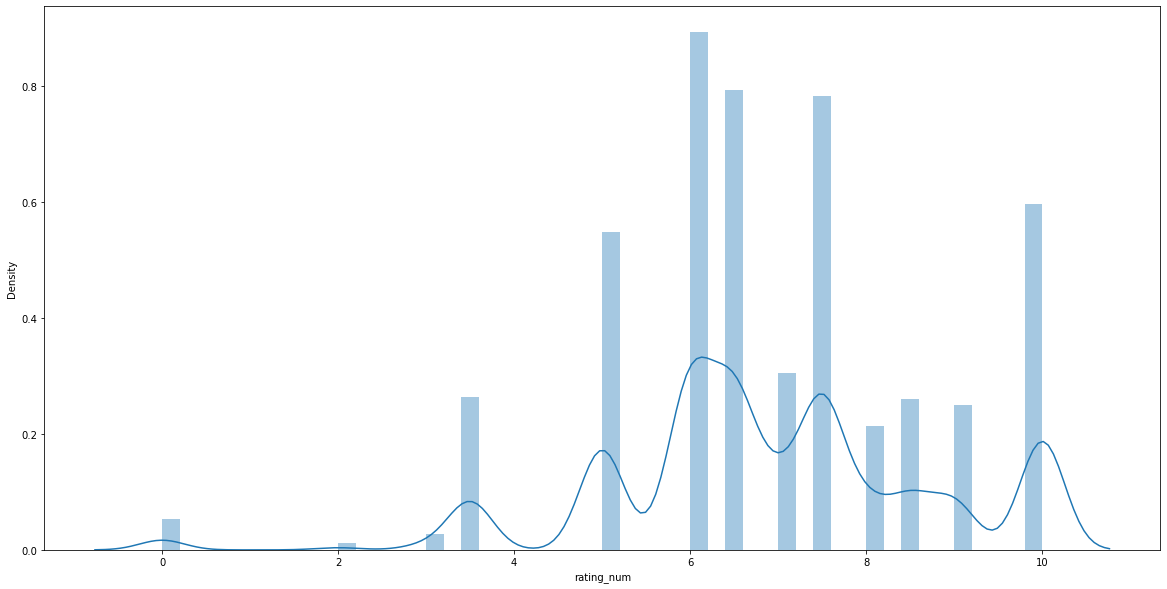

In [46]:
#importing warning library
import warnings
warnings.filterwarnings("ignore")

# distribution of target features
plt.figure(figsize=(20,10))
sns.distplot(target)
plt.show()

In [47]:
# Check minimum value of target
np.min(target)

0.0

* plots looks negatively skewed and might benefit from a log transform,but We have zero as our minimum value,so we have to use log1p.(as log(0) is not defined).

In [48]:
log_target = np.log1p(target)
log_target

0        2.079442
1        2.014903
2        2.251292
3        2.197225
4        1.504077
           ...   
20448    1.791759
20449    1.945910
20450    1.791759
20451    1.945910
20452    1.945910
Name: rating_num, Length: 20453, dtype: float64

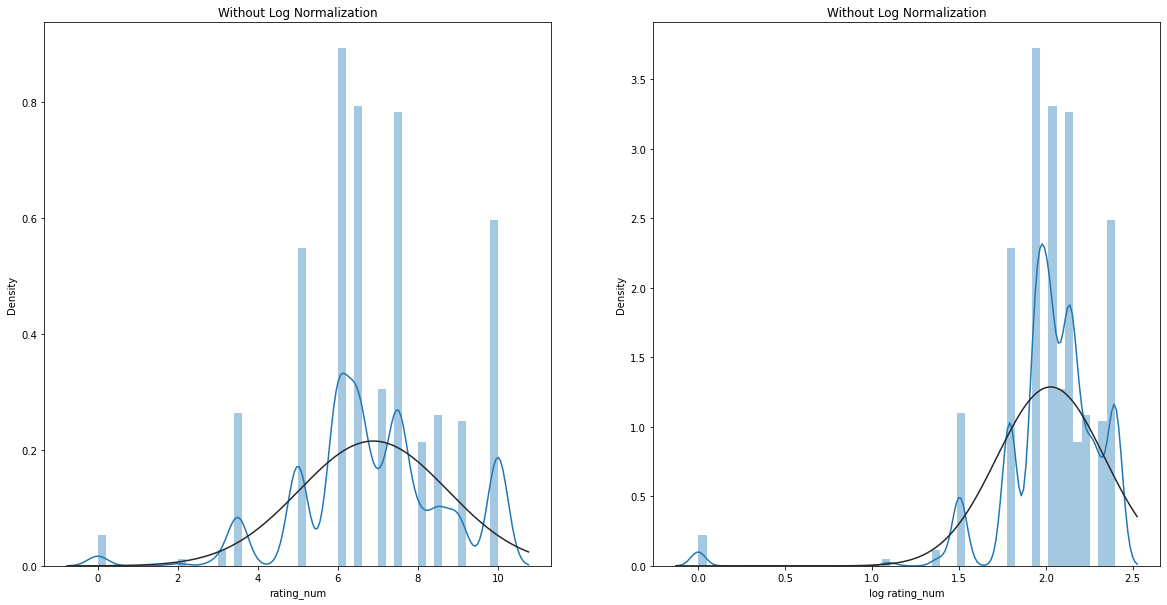

In [49]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Normalization")

plt.subplot(1,2,2)
sns.distplot(np.log1p(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("log rating_num")
plt.title("Without Log Normalization")

plt.show()

In [50]:
np.log1p(log_target)

0        1.124748
1        1.103568
2        1.179052
3        1.162283
4        0.917920
           ...   
20448    1.026672
20449    1.080418
20450    1.026672
20451    1.080418
20452    1.080418
Name: rating_num, Length: 20453, dtype: float64

# Data Splitting

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [52]:
#copy of last modiefied data
data6=data5.copy()

In [53]:
data6.shape

(29227, 856)

In [54]:
(np.log1p(log_target)).shape

(20453,)

In [55]:
data7=data6.loc[0:20452,:]
data7.shape

(20453, 856)

In [56]:
X_train,X_test,y_train,y_test=train_test_split(data7,(np.log1p(log_target)),test_size=0.2,random_state=42)

In [57]:
#checking length of X_train
len(X_train)

16362

In [58]:
#checking length of X_test
len(X_test)

4091

# Linear Regression

In [59]:
from sklearn.metrics import r2_score,mean_absolute_error
def get_evaluation_metrics(y_true,y_pred):
    
    r2_score_ = r2_score(y_true,y_pred)
    mae_ = mean_absolute_error(y_true,y_pred)
    #mape_ = mean_absolute_percentage_error(y_true,y_pred)
    
    print("R2 value {0}".format(r2_score_))
    print("MAE value {0}".format(mae_))
    #print("MAPE value {0}".format(mape_))
    
    return r2_score_,mae_

In [60]:
#Linear Regression model
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [61]:
l_reg_preds = l_reg.predict(X_test)

In [62]:
l_reg_preds

array([1.12454473, 1.04072289, 1.19248419, ..., 1.03767441, 1.11752885,
       1.25510317])

In [63]:
r2_score_linear_reg,mae_linear_reg = get_evaluation_metrics(y_test,l_reg_preds)

R2 value -1.1914234278480377e+20
MAE value 41093213.29801023


# Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor(random_state=42)

d_tree.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

In [65]:
d_tree_preds = d_tree.predict(X_test)

In [66]:
d_tree_preds

array([1.14424387, 1.2231562 , 1.08041782, ..., 1.08041782, 1.19470552,
       1.08041782])

In [67]:
r2_score_d_tree,mae_linear_d_tree = get_evaluation_metrics(y_test,d_tree_preds)

R2 value -0.6509248558029612
MAE value 0.07809819893895405


# Ramdom Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10,random_state=42)
rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [69]:
rf_preds = rf.predict(X_test)

rf_preds

array([1.1273687 , 0.99916744, 1.09260692, ..., 1.05405329, 1.05929633,
       1.15013639])

In [70]:
r2_score_rf,mae_linear_rf = get_evaluation_metrics(y_test,rf_preds)

R2 value 0.16607639363940563
MAE value 0.06271472900647179


# XGBOOST Regressor

In [71]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor(random_state = 42)
train_x=X_train.values
test_x=X_test.values

xgb_r.fit(train_x,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
xgb_preds = xgb_r.predict(test_x)
xgb_preds

array([1.1434388, 1.0898275, 1.0909855, ..., 1.0127362, 1.143236 ,
       1.2055765], dtype=float32)

In [73]:
r2_score_xgb,mae_linear_xgb = get_evaluation_metrics(y_test,xgb_preds)

R2 value 0.2690236121738433
MAE value 0.06035132967247608


# CatBoost Regressor

In [74]:
from catboost import CatBoostRegressor


In [75]:
data7 = data7.loc[:,~data7.columns.duplicated()].copy()

In [76]:
cb_r = CatBoostRegressor(random_state=42)

In [77]:
cb_r.fit(X_train,y_train)

Learning rate set to 0.063675
0:	learn: 0.1401672	total: 444ms	remaining: 7m 23s
1:	learn: 0.1393621	total: 703ms	remaining: 5m 50s
2:	learn: 0.1386797	total: 969ms	remaining: 5m 21s
3:	learn: 0.1379505	total: 1.21s	remaining: 5m
4:	learn: 0.1373799	total: 1.47s	remaining: 4m 52s
5:	learn: 0.1367992	total: 1.72s	remaining: 4m 45s
6:	learn: 0.1361854	total: 1.99s	remaining: 4m 41s
7:	learn: 0.1357073	total: 2.22s	remaining: 4m 34s
8:	learn: 0.1352649	total: 2.46s	remaining: 4m 31s
9:	learn: 0.1347863	total: 2.73s	remaining: 4m 30s
10:	learn: 0.1342252	total: 3s	remaining: 4m 30s
11:	learn: 0.1338107	total: 3.27s	remaining: 4m 28s
12:	learn: 0.1335645	total: 3.51s	remaining: 4m 26s
13:	learn: 0.1331400	total: 3.78s	remaining: 4m 26s
14:	learn: 0.1328725	total: 4.03s	remaining: 4m 24s
15:	learn: 0.1326462	total: 4.31s	remaining: 4m 25s
16:	learn: 0.1323728	total: 4.58s	remaining: 4m 24s
17:	learn: 0.1320785	total: 4.82s	remaining: 4m 22s
18:	learn: 0.1317767	total: 5.09s	remaining: 4m 22s

158:	learn: 0.1142969	total: 40.3s	remaining: 3m 33s
159:	learn: 0.1142428	total: 40.6s	remaining: 3m 32s
160:	learn: 0.1141996	total: 40.8s	remaining: 3m 32s
161:	learn: 0.1140637	total: 41s	remaining: 3m 32s
162:	learn: 0.1139048	total: 41.3s	remaining: 3m 31s
163:	learn: 0.1137992	total: 41.5s	remaining: 3m 31s
164:	learn: 0.1137081	total: 41.7s	remaining: 3m 30s
165:	learn: 0.1136007	total: 41.9s	remaining: 3m 30s
166:	learn: 0.1135427	total: 42.1s	remaining: 3m 30s
167:	learn: 0.1135068	total: 42.4s	remaining: 3m 29s
168:	learn: 0.1134331	total: 42.6s	remaining: 3m 29s
169:	learn: 0.1133304	total: 42.8s	remaining: 3m 29s
170:	learn: 0.1132275	total: 43s	remaining: 3m 28s
171:	learn: 0.1132054	total: 43.3s	remaining: 3m 28s
172:	learn: 0.1131481	total: 43.5s	remaining: 3m 27s
173:	learn: 0.1130661	total: 43.7s	remaining: 3m 27s
174:	learn: 0.1129910	total: 43.9s	remaining: 3m 26s
175:	learn: 0.1129472	total: 44.1s	remaining: 3m 26s
176:	learn: 0.1126747	total: 44.4s	remaining: 3m 2

315:	learn: 0.1010544	total: 1m 16s	remaining: 2m 45s
316:	learn: 0.1009756	total: 1m 16s	remaining: 2m 45s
317:	learn: 0.1009108	total: 1m 17s	remaining: 2m 45s
318:	learn: 0.1008843	total: 1m 17s	remaining: 2m 44s
319:	learn: 0.1008044	total: 1m 17s	remaining: 2m 44s
320:	learn: 0.1007278	total: 1m 17s	remaining: 2m 44s
321:	learn: 0.1006074	total: 1m 17s	remaining: 2m 44s
322:	learn: 0.1005532	total: 1m 18s	remaining: 2m 43s
323:	learn: 0.1004665	total: 1m 18s	remaining: 2m 43s
324:	learn: 0.1003722	total: 1m 18s	remaining: 2m 43s
325:	learn: 0.1003446	total: 1m 18s	remaining: 2m 42s
326:	learn: 0.1003091	total: 1m 19s	remaining: 2m 42s
327:	learn: 0.1001343	total: 1m 19s	remaining: 2m 42s
328:	learn: 0.1001106	total: 1m 19s	remaining: 2m 42s
329:	learn: 0.1000958	total: 1m 19s	remaining: 2m 41s
330:	learn: 0.1000395	total: 1m 19s	remaining: 2m 41s
331:	learn: 0.0999710	total: 1m 20s	remaining: 2m 41s
332:	learn: 0.0999518	total: 1m 20s	remaining: 2m 40s
333:	learn: 0.0998457	total:

467:	learn: 0.0923394	total: 1m 55s	remaining: 2m 11s
468:	learn: 0.0923082	total: 1m 56s	remaining: 2m 11s
469:	learn: 0.0922847	total: 1m 56s	remaining: 2m 11s
470:	learn: 0.0922498	total: 1m 56s	remaining: 2m 10s
471:	learn: 0.0922047	total: 1m 56s	remaining: 2m 10s
472:	learn: 0.0921454	total: 1m 57s	remaining: 2m 10s
473:	learn: 0.0920808	total: 1m 57s	remaining: 2m 10s
474:	learn: 0.0920205	total: 1m 57s	remaining: 2m 9s
475:	learn: 0.0920003	total: 1m 57s	remaining: 2m 9s
476:	learn: 0.0919940	total: 1m 58s	remaining: 2m 9s
477:	learn: 0.0919694	total: 1m 58s	remaining: 2m 9s
478:	learn: 0.0918752	total: 1m 58s	remaining: 2m 8s
479:	learn: 0.0918329	total: 1m 58s	remaining: 2m 8s
480:	learn: 0.0917894	total: 1m 58s	remaining: 2m 8s
481:	learn: 0.0917278	total: 1m 59s	remaining: 2m 8s
482:	learn: 0.0917101	total: 1m 59s	remaining: 2m 7s
483:	learn: 0.0916852	total: 1m 59s	remaining: 2m 7s
484:	learn: 0.0916152	total: 1m 59s	remaining: 2m 7s
485:	learn: 0.0914988	total: 2m	remaini

621:	learn: 0.0853154	total: 2m 32s	remaining: 1m 32s
622:	learn: 0.0852753	total: 2m 32s	remaining: 1m 32s
623:	learn: 0.0852483	total: 2m 32s	remaining: 1m 32s
624:	learn: 0.0852164	total: 2m 32s	remaining: 1m 31s
625:	learn: 0.0851772	total: 2m 33s	remaining: 1m 31s
626:	learn: 0.0851201	total: 2m 33s	remaining: 1m 31s
627:	learn: 0.0850679	total: 2m 33s	remaining: 1m 31s
628:	learn: 0.0850171	total: 2m 33s	remaining: 1m 30s
629:	learn: 0.0849731	total: 2m 34s	remaining: 1m 30s
630:	learn: 0.0849658	total: 2m 34s	remaining: 1m 30s
631:	learn: 0.0849243	total: 2m 34s	remaining: 1m 30s
632:	learn: 0.0848369	total: 2m 34s	remaining: 1m 29s
633:	learn: 0.0848058	total: 2m 35s	remaining: 1m 29s
634:	learn: 0.0847591	total: 2m 35s	remaining: 1m 29s
635:	learn: 0.0846110	total: 2m 35s	remaining: 1m 29s
636:	learn: 0.0845692	total: 2m 35s	remaining: 1m 28s
637:	learn: 0.0845374	total: 2m 35s	remaining: 1m 28s
638:	learn: 0.0844838	total: 2m 36s	remaining: 1m 28s
639:	learn: 0.0844487	total:

776:	learn: 0.0790756	total: 3m 10s	remaining: 54.8s
777:	learn: 0.0790353	total: 3m 11s	remaining: 54.5s
778:	learn: 0.0790305	total: 3m 11s	remaining: 54.3s
779:	learn: 0.0790007	total: 3m 11s	remaining: 54s
780:	learn: 0.0789204	total: 3m 11s	remaining: 53.8s
781:	learn: 0.0788927	total: 3m 12s	remaining: 53.6s
782:	learn: 0.0788806	total: 3m 12s	remaining: 53.3s
783:	learn: 0.0788498	total: 3m 12s	remaining: 53.1s
784:	learn: 0.0788027	total: 3m 12s	remaining: 52.8s
785:	learn: 0.0787818	total: 3m 13s	remaining: 52.6s
786:	learn: 0.0787207	total: 3m 13s	remaining: 52.3s
787:	learn: 0.0786982	total: 3m 13s	remaining: 52.1s
788:	learn: 0.0786763	total: 3m 13s	remaining: 51.8s
789:	learn: 0.0786223	total: 3m 14s	remaining: 51.6s
790:	learn: 0.0785925	total: 3m 14s	remaining: 51.3s
791:	learn: 0.0785818	total: 3m 14s	remaining: 51.1s
792:	learn: 0.0785778	total: 3m 14s	remaining: 50.8s
793:	learn: 0.0785316	total: 3m 14s	remaining: 50.6s
794:	learn: 0.0785274	total: 3m 15s	remaining: 5

931:	learn: 0.0737473	total: 3m 50s	remaining: 16.8s
932:	learn: 0.0736686	total: 3m 50s	remaining: 16.6s
933:	learn: 0.0736459	total: 3m 50s	remaining: 16.3s
934:	learn: 0.0736001	total: 3m 51s	remaining: 16.1s
935:	learn: 0.0735775	total: 3m 51s	remaining: 15.8s
936:	learn: 0.0735369	total: 3m 51s	remaining: 15.6s
937:	learn: 0.0734780	total: 3m 51s	remaining: 15.3s
938:	learn: 0.0734488	total: 3m 52s	remaining: 15.1s
939:	learn: 0.0734323	total: 3m 52s	remaining: 14.8s
940:	learn: 0.0734217	total: 3m 52s	remaining: 14.6s
941:	learn: 0.0734096	total: 3m 52s	remaining: 14.3s
942:	learn: 0.0733770	total: 3m 53s	remaining: 14.1s
943:	learn: 0.0733323	total: 3m 53s	remaining: 13.9s
944:	learn: 0.0732950	total: 3m 53s	remaining: 13.6s
945:	learn: 0.0732343	total: 3m 54s	remaining: 13.4s
946:	learn: 0.0732113	total: 3m 54s	remaining: 13.1s
947:	learn: 0.0731856	total: 3m 54s	remaining: 12.9s
948:	learn: 0.0731519	total: 3m 54s	remaining: 12.6s
949:	learn: 0.0730679	total: 3m 55s	remaining:

In [78]:
cb_preds = cb_r.predict(X_test)

In [79]:
r2_score_cb,mae_linear_cb = get_evaluation_metrics(y_test,cb_preds)

R2 value 0.3205763969064196
MAE value 0.05866359695945928


# AdaBoost Regressor

In [80]:
from sklearn.ensemble import AdaBoostRegressor

adb = AdaBoostRegressor(random_state=42)

In [81]:
adb.fit(X_train,y_train)

AdaBoostRegressor(random_state=42)

In [82]:
adb_preds = adb.predict(X_test)

In [83]:
r2_score_adb,mae_linear_adb = get_evaluation_metrics(y_test,adb_preds)

R2 value -1.3644654401050578
MAE value 0.14072404136956482


# Gradient Boosting Regressor

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
gb_r = GradientBoostingRegressor(random_state=42)
gb_r.fit(X_train,y_train)


GradientBoostingRegressor(random_state=42)

In [85]:
gb_r_preds = gb_r.predict(X_test)

In [86]:
r2_score_gb,mae_linear_gb = get_evaluation_metrics(y_test,gb_r_preds)

R2 value 0.17432746939600974
MAE value 0.06353486196889073


# Out  of all the model r2 score,catboost has the best r2 score of 0.32.